In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Reading the data file using pandas
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.shape

(9240, 37)

In [ ]:
df.duplicated(subset = 'Prospect ID').sum()

0

In [ ]:
df.duplicated(subset = 'Lead Number').sum()

0

EXPLORATORY DATA ANALYSIS

Data Cleaning & Treatment:

In [ ]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [ ]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [ ]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [ ]:
df.nunique().sort_values(ascending = True)

Update me on Supply Chain Content                   1
I agree to pay the amount through cheque            1
Magazine                                            1
Receive More Updates About Our Courses              1
Get updates on DM Content                           1
A free copy of Mastering The Interview              2
Newspaper Article                                   2
Search                                              2
Through Recommendations                             2
X Education Forums                                  2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Newspaper                                           2
Digital Advertisement                               2
Asymmetrique Activity Index                         3
What matters most to you in choosing a course       3
Asymmetrique Profile Index                          3
Lead Quality                

In [ ]:
df[['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content']].value_counts()

Magazine  Receive More Updates About Our Courses  I agree to pay the amount through cheque  Get updates on DM Content  Update me on Supply Chain Content
No        No                                      No                                        No                         No                                   9240
dtype: int64

In [ ]:
# Drop multiple columns
columns_to_drop = ['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Display the resulting DataFrame
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [ ]:
df.nunique().sort_values(ascending = True)

Search                                              2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
Newspaper Article                                   2
A free copy of Mastering The Interview              2
Asymmetrique Profile Index                          3
Asymmetrique Activity Index                         3
What matters most to you in choosing a course       3
Lead Profile                                        5
Lead Quality                                        5
Lead Origin                                         5
City                                                6
What is your current occupation                     6
How did you hear about X Edu

In [ ]:
#creating a function to find null values

def null_values(data_frame):
  return round((data_frame.isnull().sum()*100/len(data_frame)).sort_values(ascending = False),2)

In [ ]:
null_values(df)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Lead Origi

<Axes: >

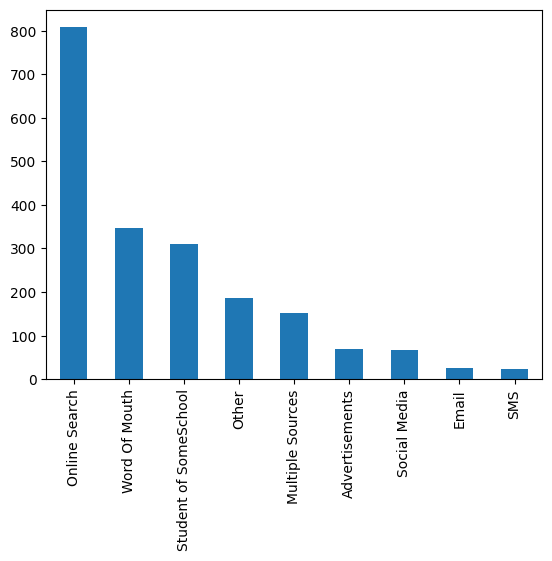

In [ ]:
df['How did you hear about X Education'].value_counts().plot.bar()

In [ ]:
df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [ ]:
#dropping cols with more than 45% missing values

drop_cols=df.columns

for i in drop_cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [ ]:
null_values(df)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

Categorical Attributes Analysis:

In [ ]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

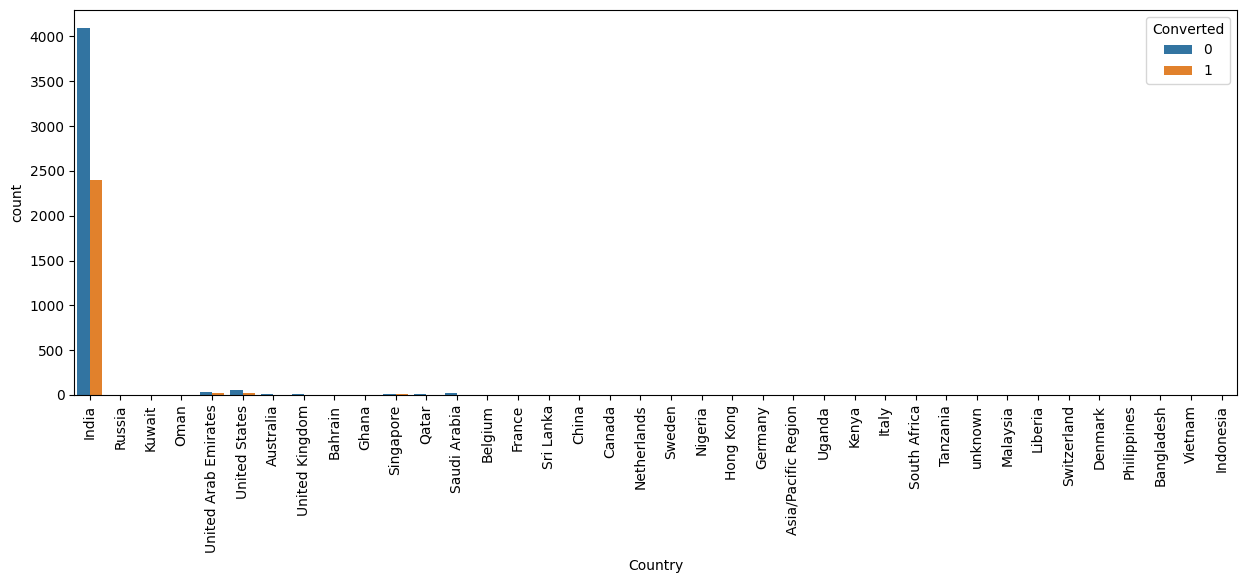

In [ ]:
#plotting spread of Country columnn
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Country, y=None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

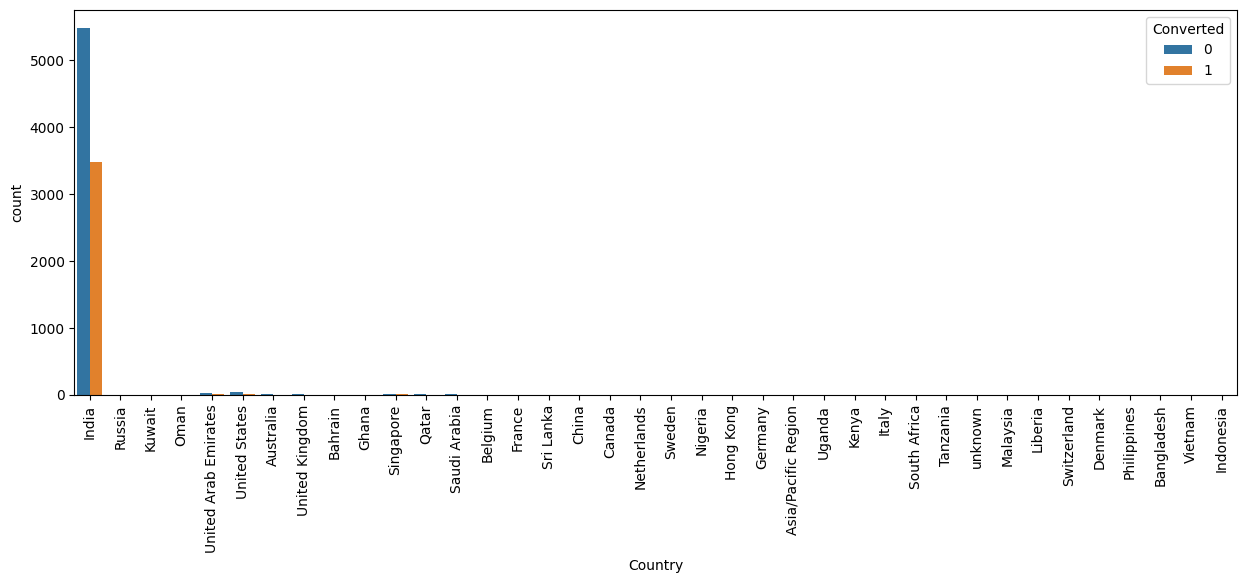

In [ ]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Country, y=None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
df['Country'].value_counts(normalize= True)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [ ]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [ ]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
df['City'] = df['City'].fillna('not provided')

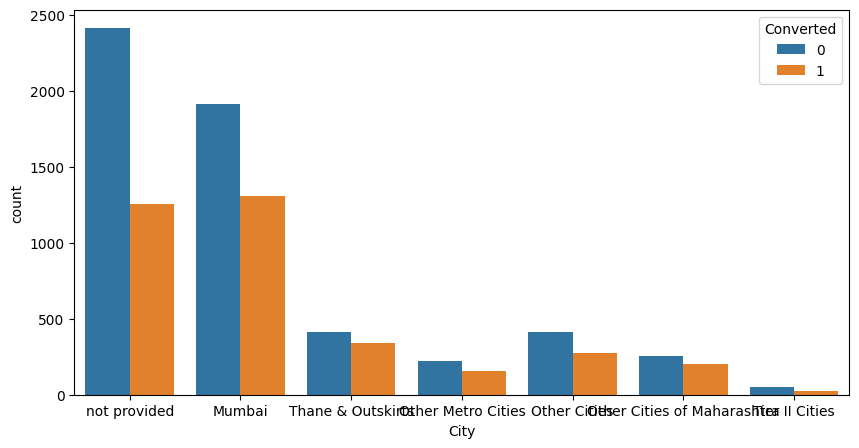

In [ ]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(x=df.City, y= None, hue=df.Converted)
plt.show()

In [ ]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
#we will replace NaN values in Specialization column with 'not provided'

df['Specialization'] = df['Specialization'].replace(np.nan, 'not provided')

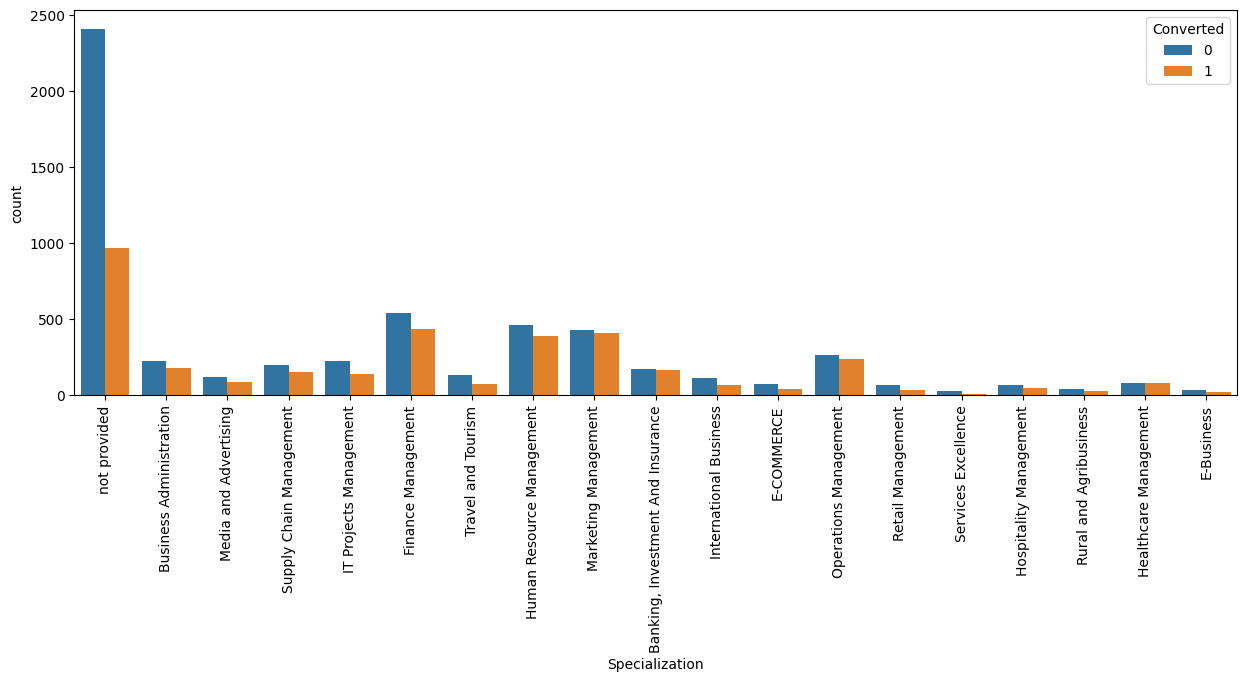

In [ ]:
#plotting spread of Specialization columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Specialization, y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                    'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                    'Retail Management'] ,'Management_Specializations')

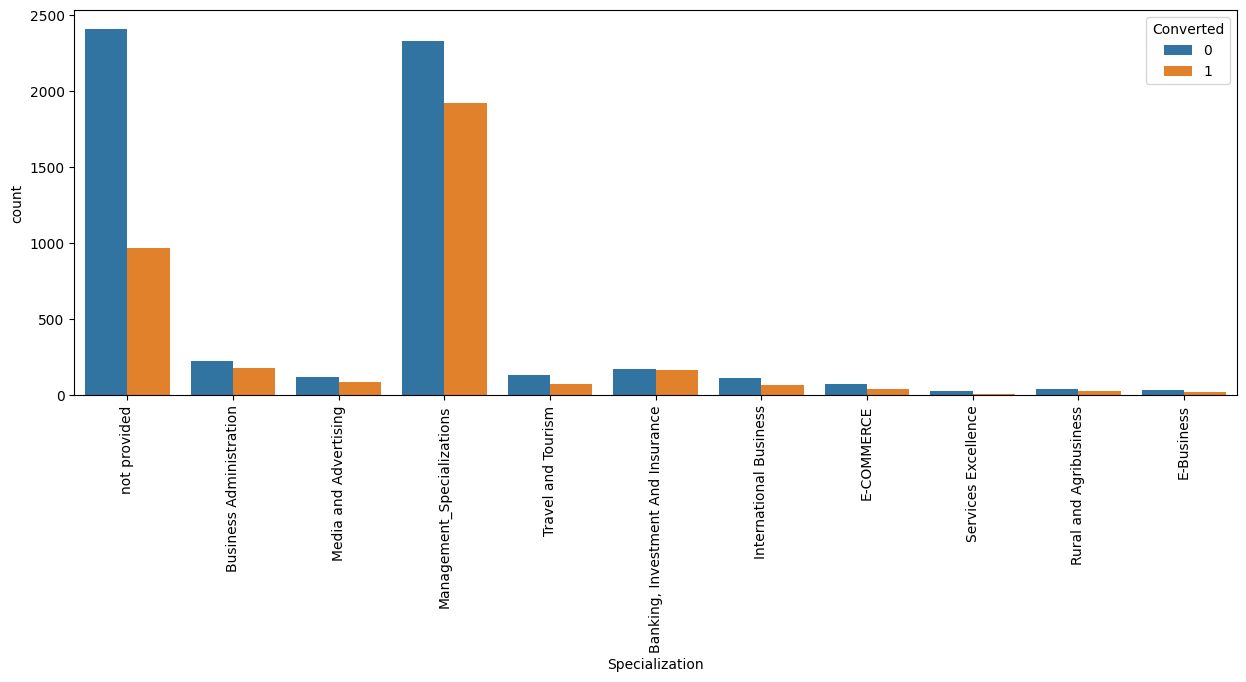

In [ ]:
#plotting spread of Specialization columnn after converting

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Specialization, y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [ ]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

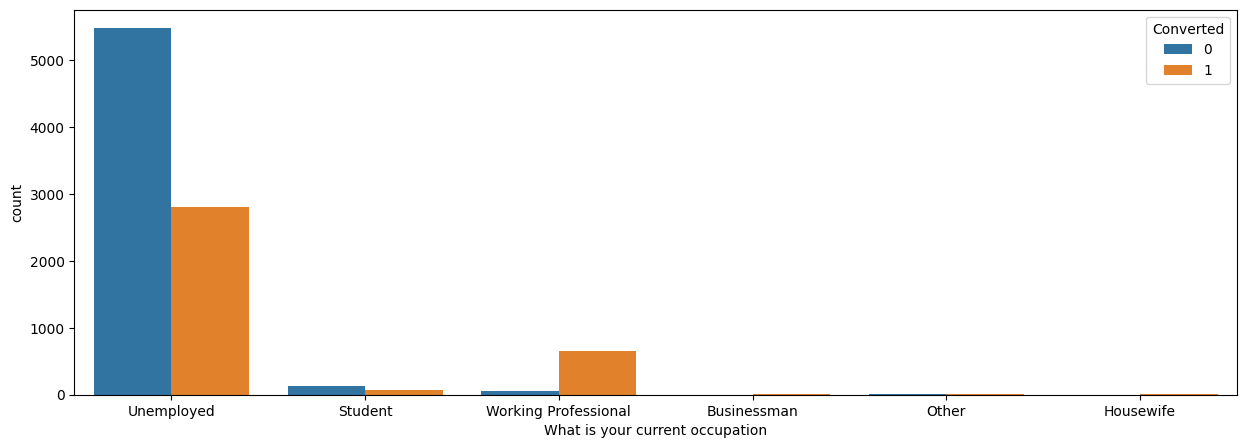

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x=df['What is your current occupation'], y= None, hue=df.Converted)
plt.show()

Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in terms of Absolute numbers.

In [ ]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

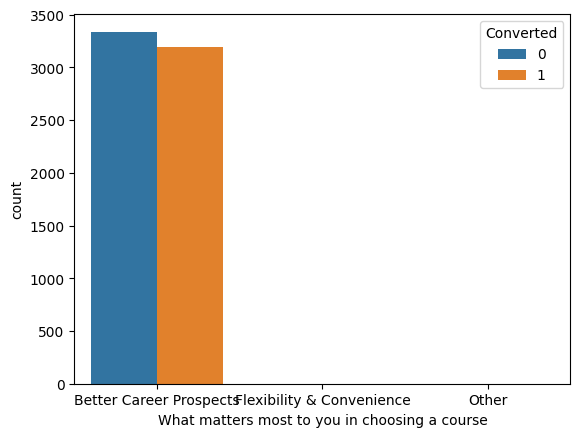

In [ ]:
#visualizing count of Variable based on Converted value

sns.countplot(x=df['What matters most to you in choosing a course'],y=None, hue=df.Converted)
plt.show()

In [ ]:
#Since most of the data falls under "Better Career Prospects" we cannot infer any conclusion from this, so we can drop this column.
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [ ]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [ ]:
#replacing Nan values with "not provided"
df['Tags'] = df['Tags'].replace(np.nan,'not provided')

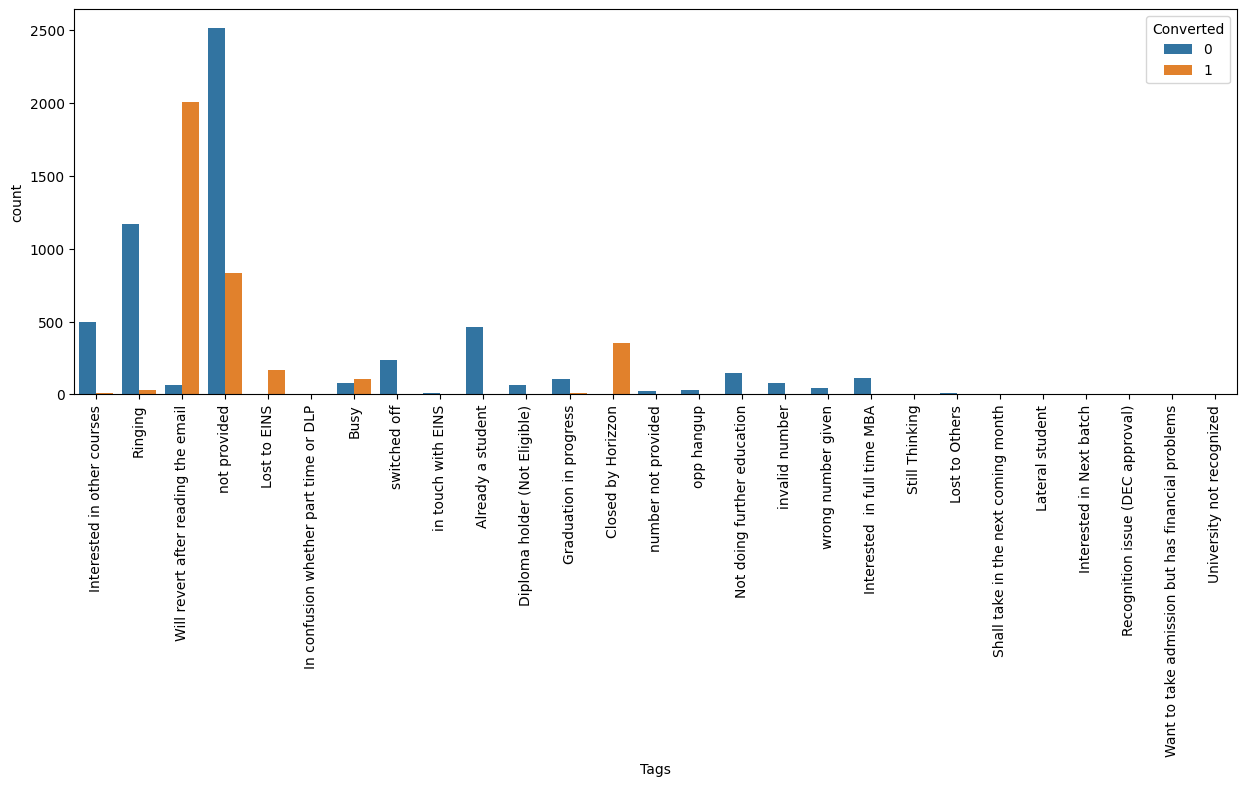

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Tags'], y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#replacing tags with low frequency with "Other Tags"

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                    'wrong number given','Interested  in full time MBA'], 'Other_Tags')



In [ ]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [ ]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [ ]:
df.shape

(9240, 23)

In [ ]:
df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

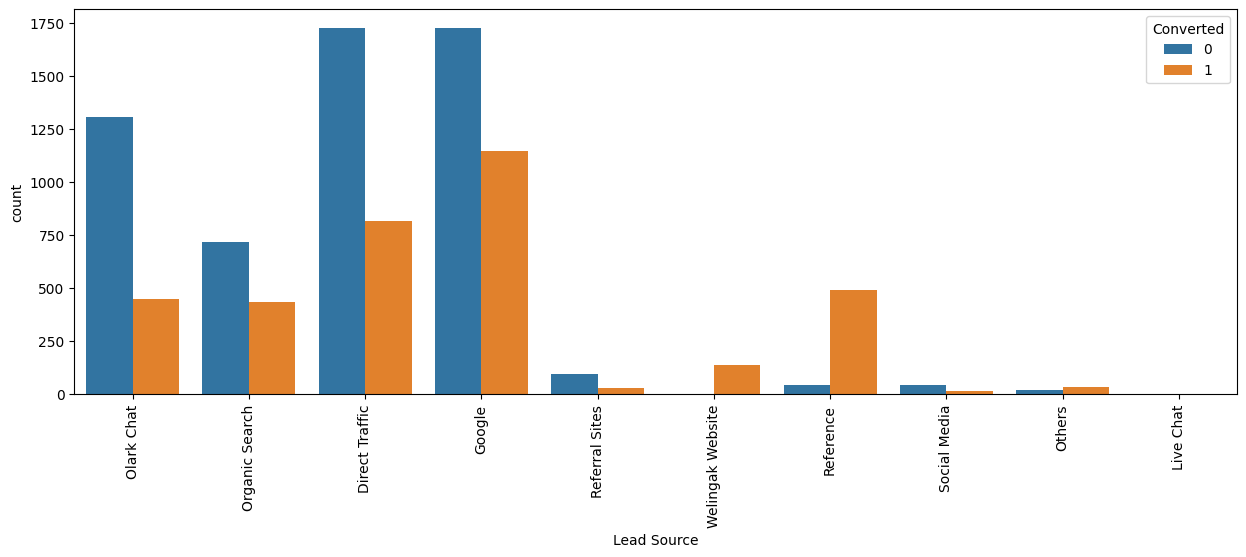

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Lead Source'], y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference

*   Maximum number of leads are generated by Google and Direct traffic.
*   Conversion Rate of reference leads and leads through welingak website is high.
*   To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.






In [ ]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront',
                                                   'View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails',
                                                   'Visited Booth in Tradeshow'],'Others')

In [ ]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [ ]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [ ]:
df.shape

(9240, 23)

In [ ]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
#df = df.dropna()

In [ ]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [ ]:
#Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

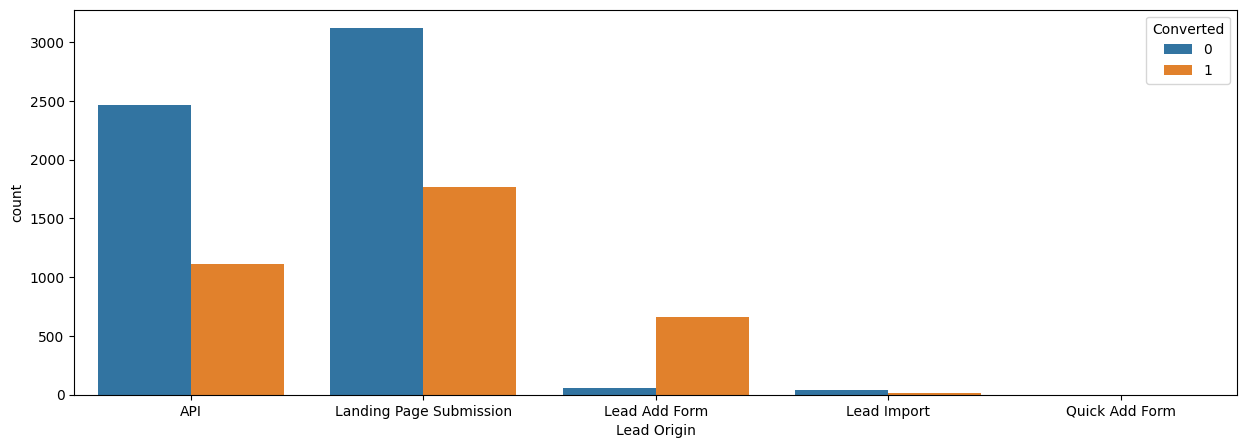

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x=df['Lead Origin'], y= None, hue=df.Converted)
plt.show()

Inference
API and Landing Page Submission bring higher number of leads as well as conversion.

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import and Quick Add Form get very few leads.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

<Axes: xlabel='Do Not Call', ylabel='count'>

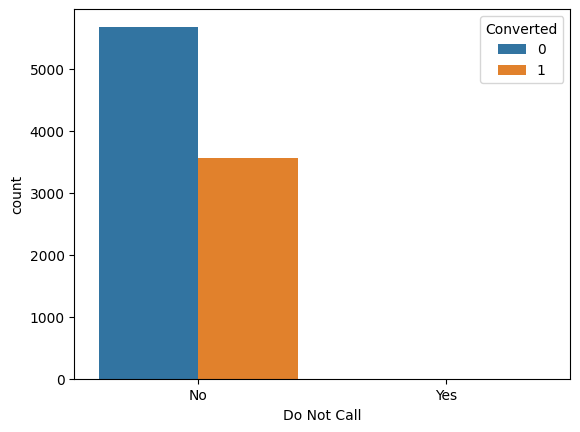

In [ ]:
#Do Not Email

sns.countplot(x=df['Do Not Call'], y= None, hue=df.Converted)



<Axes: xlabel='Do Not Email', ylabel='count'>

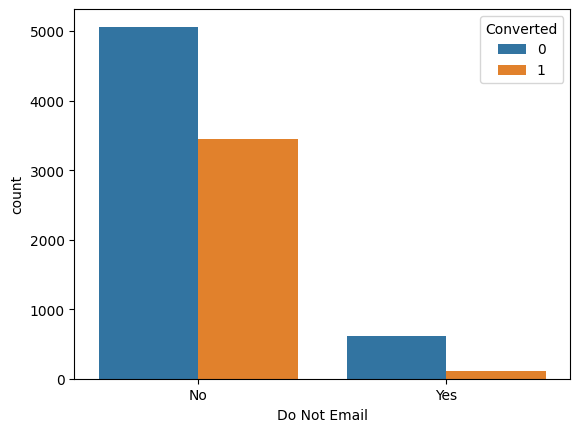

In [ ]:
#Do Not Call
#visualizing count of Variable based on Converted value

sns.countplot(x=df['Do Not Email'], y= None, hue=df.Converted)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [ ]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [ ]:
df.Search.value_counts(dropna=True)

No     9226
Yes      14
Name: Search, dtype: int64

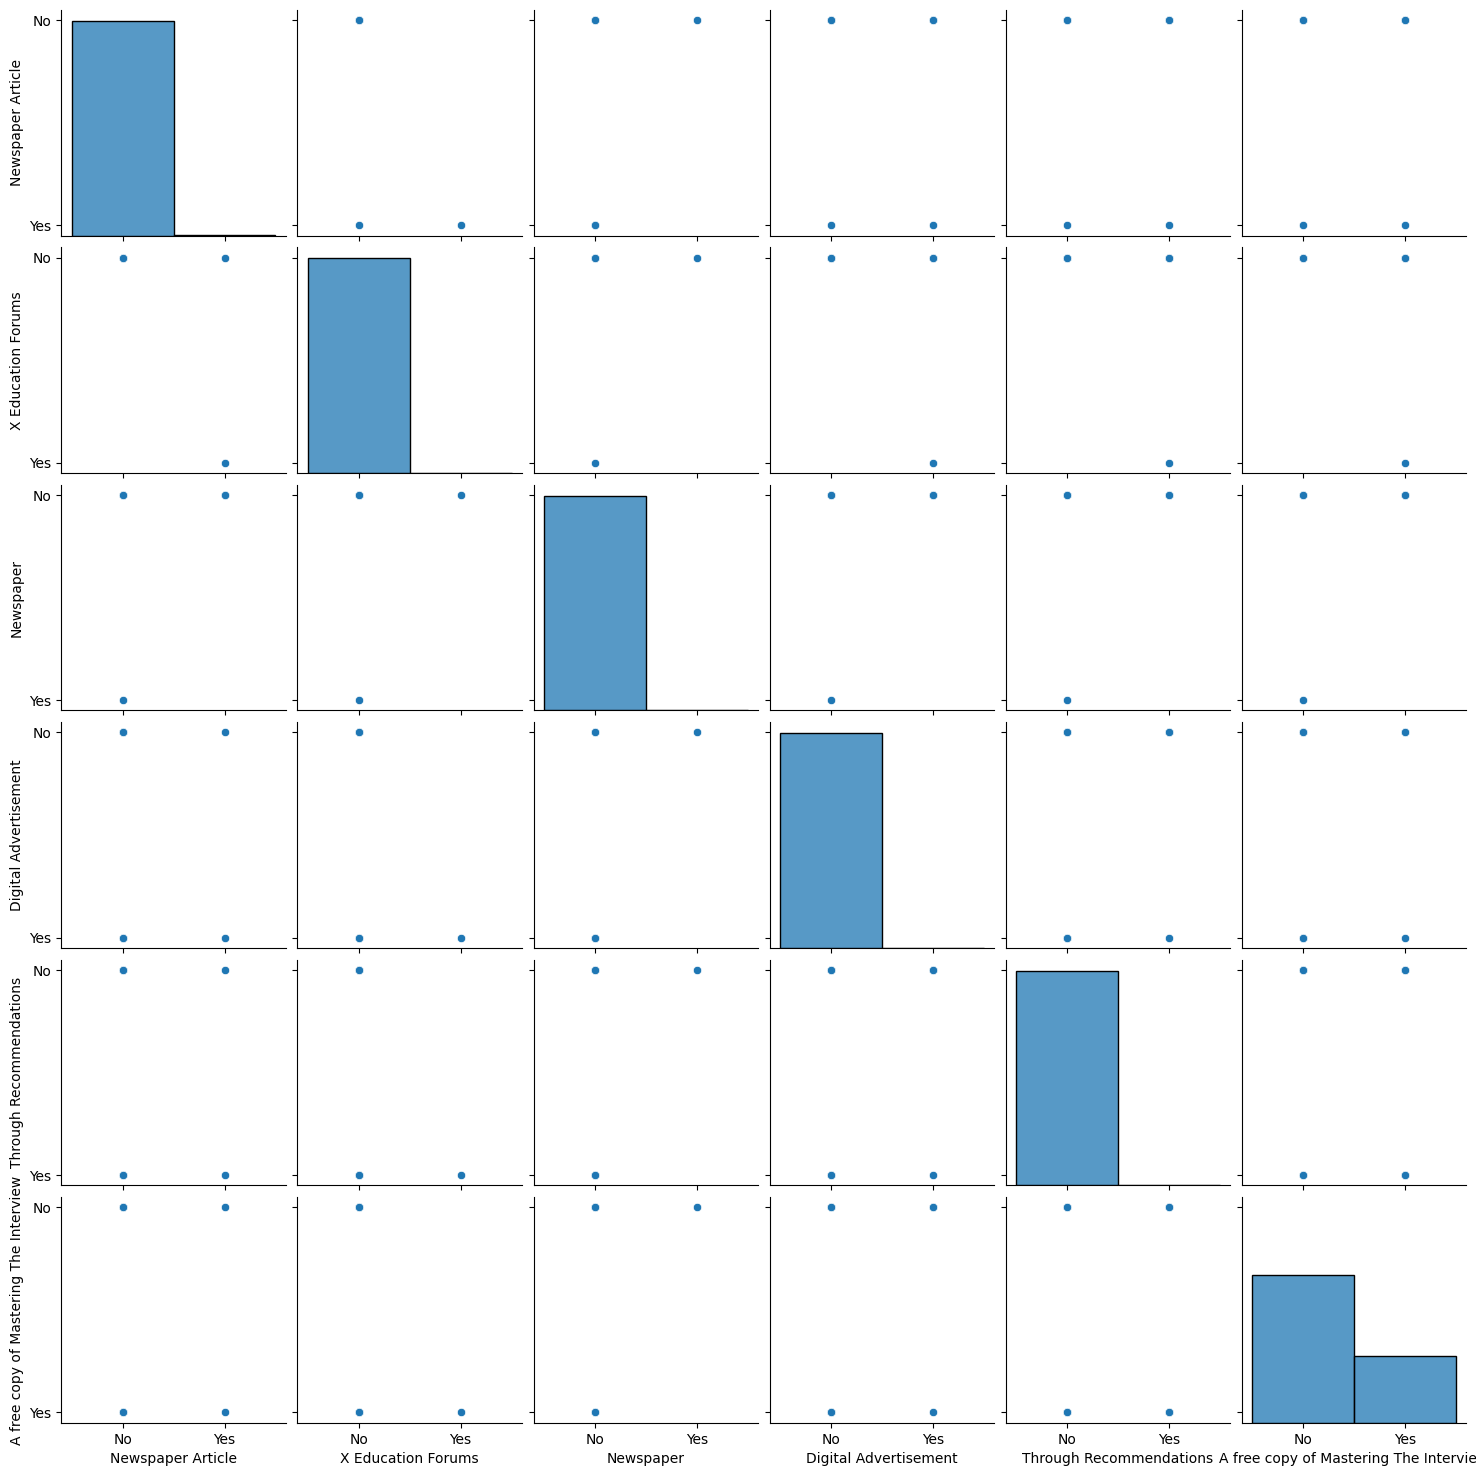

In [ ]:
sns.pairplot(data=df, vars=['Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
   ,'A free copy of Mastering The Interview'])
plt.show()

In [ ]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [ ]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed',
                                                                         'Email Bounced','Resubscribed to emails','View in browser link Clicked',
                                                                         'Approached upfront','Form Submitted on Website','Email Received'],
                                                                        'Other_Notable_activity')

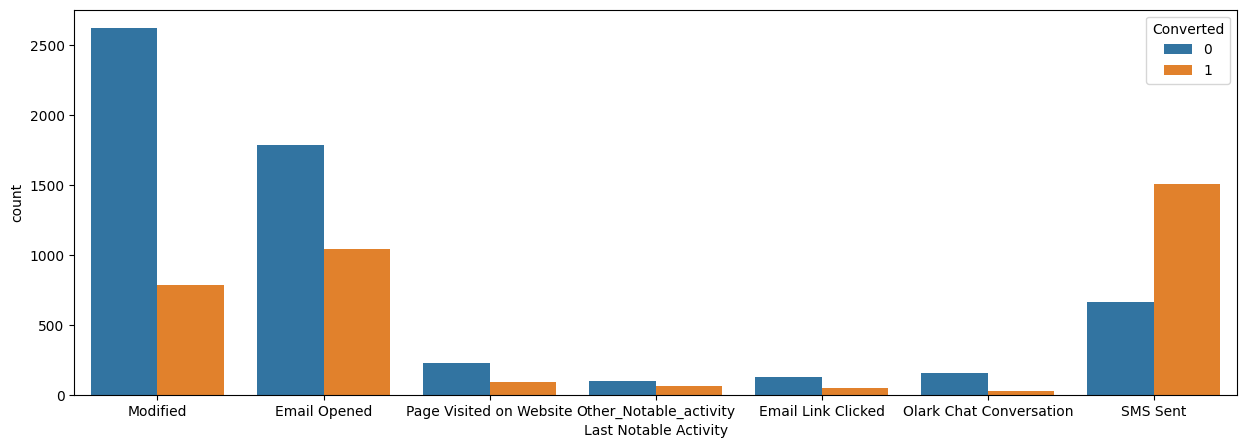

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x=df['Last Notable Activity'], y= None, hue=df.Converted)
plt.show()

In [ ]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations'])

In [ ]:
#dropping columns
df = df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [ ]:
null_values(df)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [ ]:
null_values(df)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Numerical Attributes Analysis:

In [ ]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


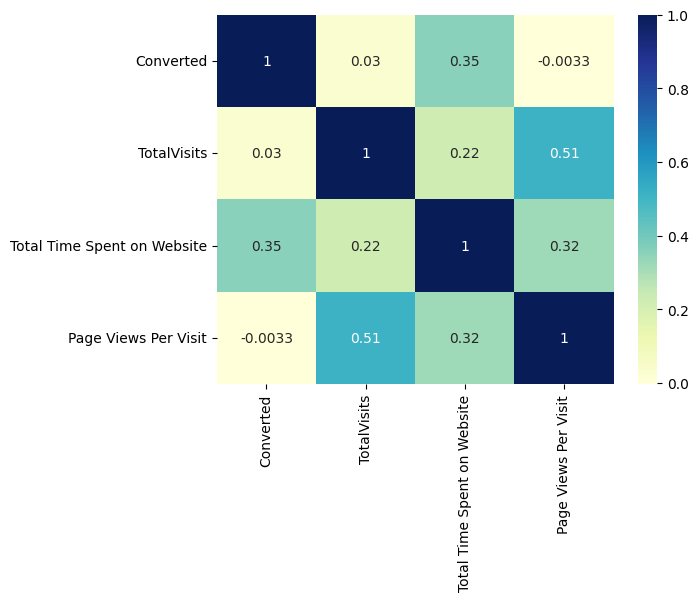

In [ ]:
#Checking correlations of numeric values

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is high corelation between TotalVisits and Page Views Per Visit

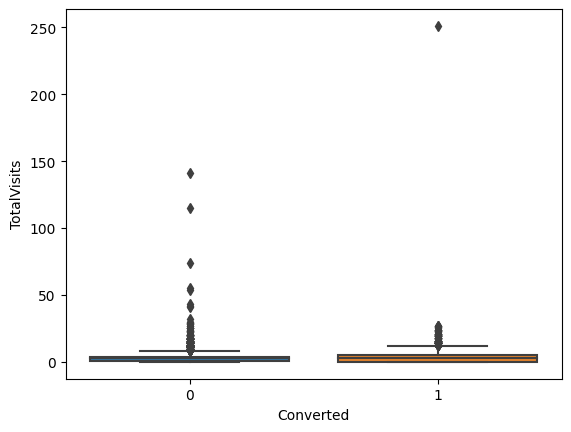

In [ ]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=df,x="Converted", y="TotalVisits",)
plt.show()

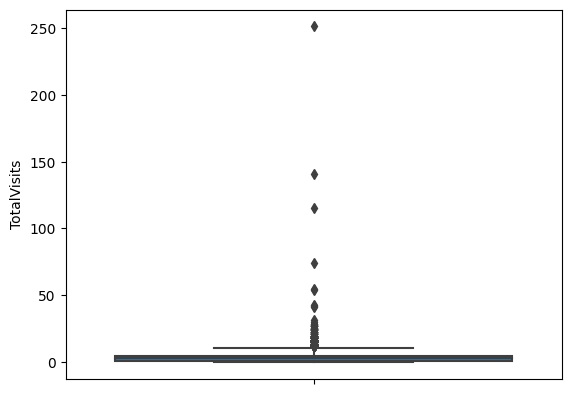

In [ ]:
sns.boxplot(data=df,y="TotalVisits")
plt.show()

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000
99%,1.000000,17.000000,1838.960000,9.000000


In [ ]:
df.shape

(9103, 14)

In [ ]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

def remove_outliers(data, column):
    # Calculate threshold values
    lower_threshold = data[column].quantile(0.01)
    upper_threshold = data[column].quantile(0.99)

    # Filter outliers
    filtered_data = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]

    return filtered_data

In [ ]:
df.shape

(9103, 14)

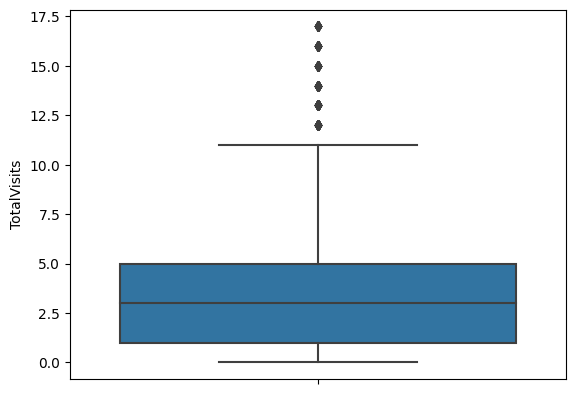

In [ ]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

df = remove_outliers(df, 'TotalVisits')
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [ ]:
df.shape

(9020, 14)

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df['Total Time Spent on Website'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

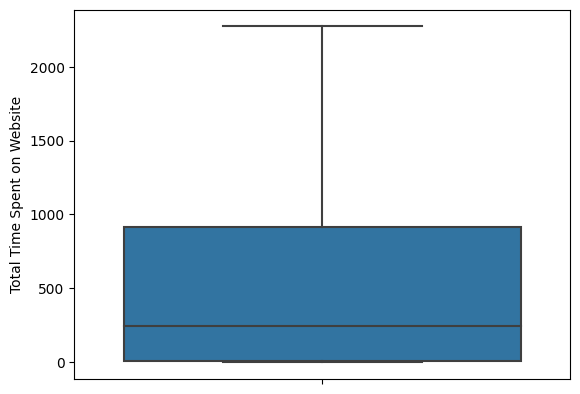

In [ ]:
sns.boxplot(data=df,y='Total Time Spent on Website')
plt.show()

From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

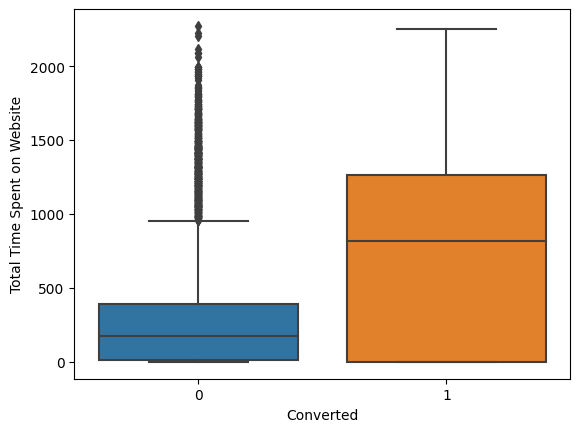

In [ ]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

People spending more time on website are more likely to be converted

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df['Page Views Per Visit'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

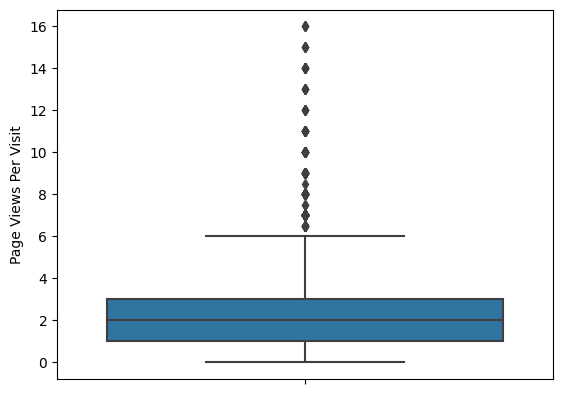

In [ ]:
sns.boxplot(data=df,y='Page Views Per Visit')
plt.show()

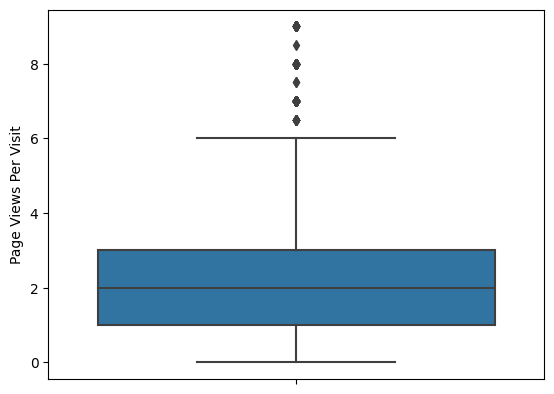

In [ ]:
# Remove outliers from column
df = remove_outliers(df, 'Page Views Per Visit')
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

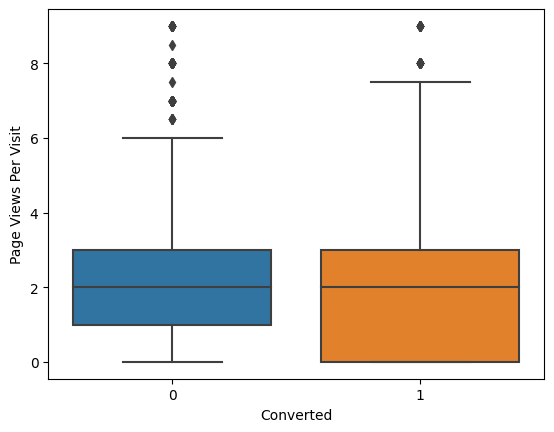

In [ ]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

In [ ]:
df.shape

(8953, 14)

# Creation of Dummy Varialbles

In [ ]:
#List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
dummy = dummy.drop(['City_not provided'], 1)
df = pd.concat([df,dummy],1)

In [ ]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_not provided'], 1)
df = pd.concat([df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_not provided'], 1)
df = pd.concat([df, dummy], axis = 1)

In [ ]:
#getting a list of categorical columns

cols= df.select_dtypes(include=['object']).columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [ ]:
#dropping the original columns after dummy variable creation

df.drop(cols,1,inplace = True)

# Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

X=df.drop('Converted', axis=1)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   A free copy of Mastering The Interview                6267 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 7   Lead Origin_Lead Import                               6267 non-null   uint8  
 8   What is your current occupation_Housewife             6

In [ ]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,-0.28572,0.668862,1.848117,1.455819,-0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4696,-0.28572,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3274,-0.28572,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,-0.28572,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,-0.28572,0.319082,1.258415,-0.481679,-0.667339,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


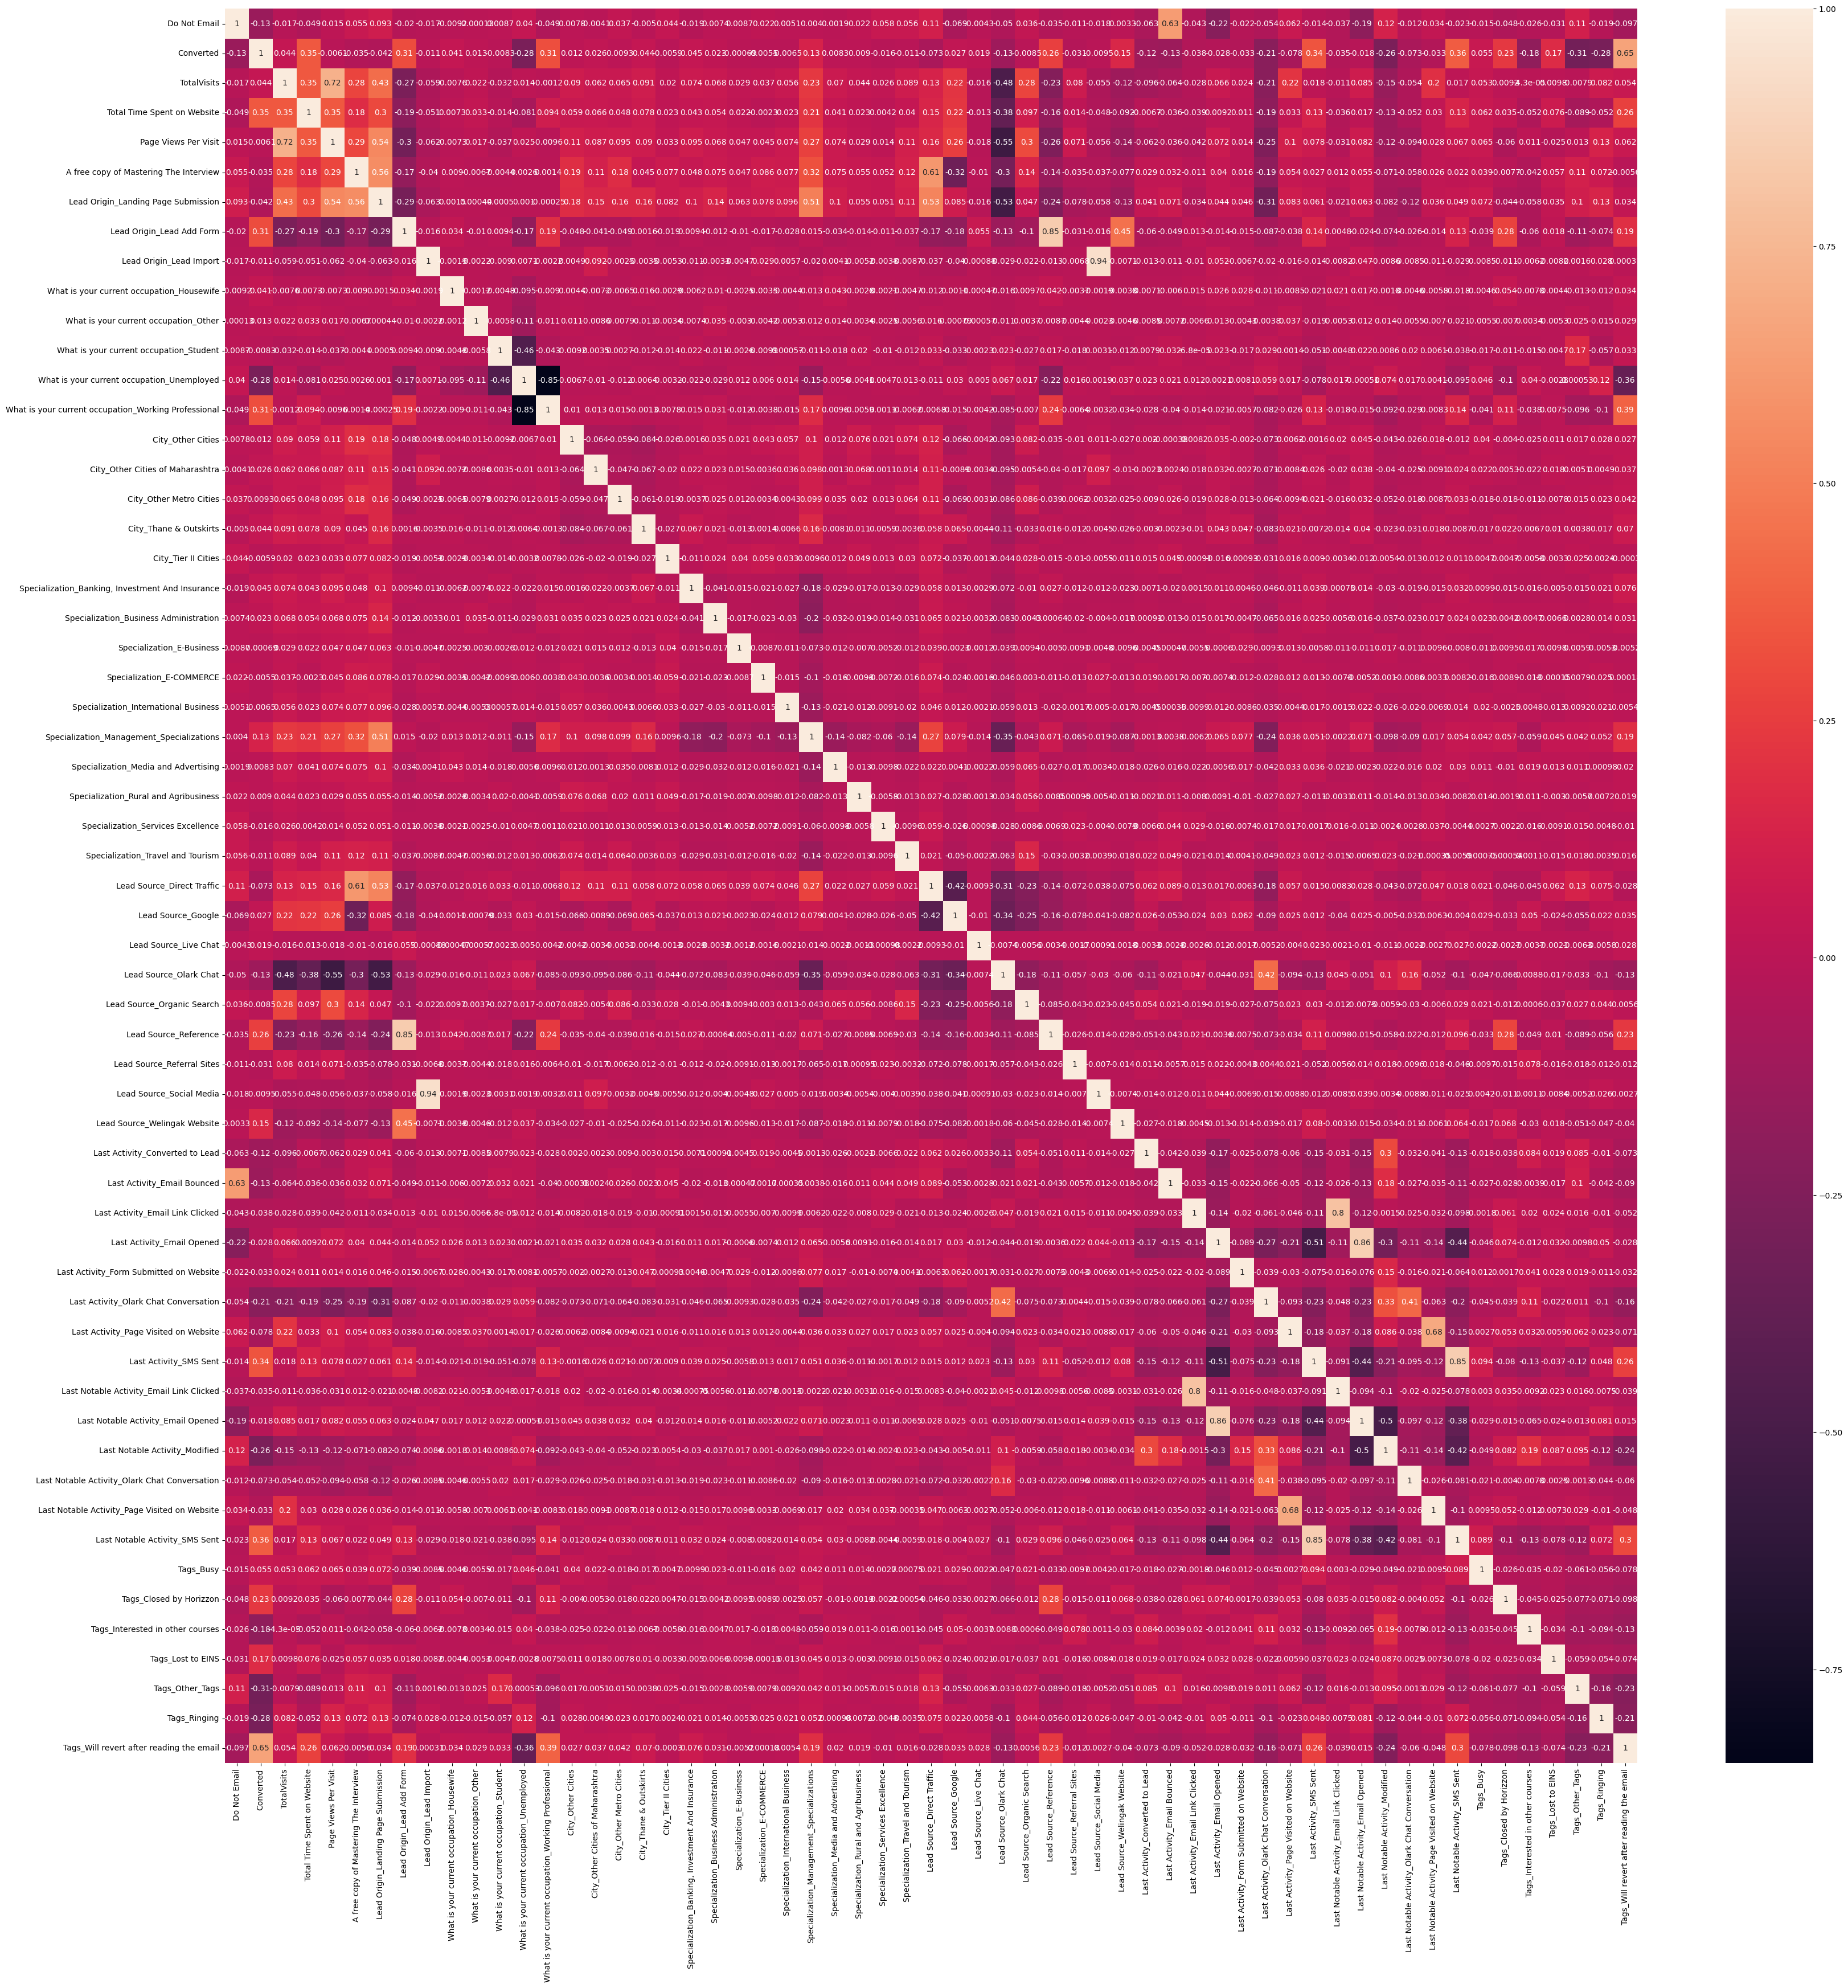

In [ ]:
# Let's see the correlation matrix
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

"What is current"

Model Building using Stats Model & RFE:

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg, step = 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('What is your current occupation_Housewife', False, 3),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', False, 2),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 2),
 ('City_Other Cities of Maharashtra', False, 3),
 ('City_Other Metro Cities', False, 3),
 ('City_Thane & Outskirts', False, 3),
 ('City_Tier II Cities', False, 2),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 3),
 ('Specialization_E-CO

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ot

In [ ]:
# columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on W

In [ ]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.1
Date:                Sun, 18 Jun 2023   Deviance:                       2378.1
Time:                        18:53:39   Pearson chi2:                 7.81e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6130
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3283      0.132     -2.493      0.013      -0.586      -0.070
Total Time Spent on Website                              1.0924      0.062     17.514      0.000       0.970       1.215
Lead Origin_Landing Page Submission                     -0.7500      0.154     -4.882      0.000      -1.051      -0.449
Lead Origin_Lead Add Form                                1.6229      1.012      1.603      0.109      -0.361       3.607
What is your current occupation_Working Professional     0.9842      0.416      2.365      0.018       0.169       1.800
Specialization_Banking, Investment And Insurance         0.4822      0.304      1.585      0.113      -0.114       1.078
Specialization_Travel and Tourism                       -0.8765      0.480     -1.827      0.068      -1.817       0.064
Lead Source_Direct Traffic                              -1.1220      0.224     -5.006      0.000      -1.561      -0.683
Lead Source_Google                                      -0.8201      0.180     -4.556      0.000      -1.173      -0.467
Lead Source_Organic Search                              -0.8905      0.217     -4.113      0.000      -1.315      -0.466
Lead Source_Reference                                   -1.0325      1.122     -0.920      0.358      -3.232       1.167
Lead Source_Referral Sites                              -1.2460      0.487     -2.560      0.010      -2.200      -0.292
Lead Source_Social Media                                -0.5113      0.828     -0.617      0.537      -2.135       1.112
Lead Source_Welingak Website                             3.3539      1.433      2.341      0.019       0.546       6.162
Last Activity_Converted to Lead                         -0.7683      0.385     -1.994      0.046      -1.523      -0.013
Last Activity_Email Bounced                             -1.2452      0.478     -2.604      0.009      -2.182      -0.308
Last Activity_Olark Chat Conversation                   -1.2459      0.315     -3.950      0.000      -1.864      -0.628
Last Activity_Page Visited on Website                   -0.7134      0.269     -2.655      0.008      -1.240      -0.187
Last Activity_SMS Sent                                   0.8507      0.262      3.251      0.001       0.338       1.363
Last Notable Activity_Email Link Clicked                -1.3727      0.478     -2.874      0.004      -2.309      -0.437
Last Notable Activity_Modified                          -0.8613      0.190     -4.542      0.000      -1.233      -0.490
Last Notable Activity_Olark Chat Conversation           -1.0387      0.576     -1.803      0.071      -2.168       0.090
Last Notable Activity_SMS Sent                           1

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.241868
4696    0.029179
3274    0.391176
2164    0.003426
1667    0.991995
7024    0.217368
8018    0.027499
778     0.063514
6942    0.003594
4440    0.071571
dtype: float64

In [ ]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24186807, 0.02917858, 0.39117586, 0.00342596, 0.99199511,
       0.21736799, 0.02749945, 0.06351384, 0.00359422, 0.07157073])

In [ ]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.241868
1,0,0.029179
2,0,0.391176
3,0,0.003426
4,1,0.991995


In [ ]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.241868,0
1,0,0.029179,0
2,0,0.391176,0
3,0,0.003426,0
4,1,0.991995,1


In [ ]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3720  162]
 [ 276 2109]]


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9301101005265677

In [ ]:
#dropping column with high p-value

col = col.drop('Lead Source_Social Media',1)
col = col.drop('Lead Source_Reference',1)

In [ ]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.7
Date:                Sun, 18 Jun 2023   Deviance:                       2379.4
Time:                        18:53:40   Pearson chi2:                 7.82e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3372      0.131     -2.576      0.010      -0.594      -0.081
Total Time Spent on Website                              1.0920      0.062     17.517      0.000       0.970       1.214
Lead Origin_Landing Page Submission                     -0.7492      0.154     -4.878      0.000      -1.050      -0.448
Lead Origin_Lead Add Form                                0.8148      0.464      1.756      0.079      -0.095       1.724
What is your current occupation_Working Professional     0.9753      0.415      2.348      0.019       0.161       1.790
Specialization_Banking, Investment And Insurance         0.4796      0.304      1.576      0.115      -0.117       1.076
Specialization_Travel and Tourism                       -0.8734      0.479     -1.824      0.068      -1.812       0.065
Lead Source_Direct Traffic                              -1.1087      0.223     -4.964      0.000      -1.547      -0.671
Lead Source_Google                                      -0.8081      0.179     -4.510      0.000      -1.159      -0.457
Lead Source_Organic Search                              -0.8780      0.216     -4.069      0.000      -1.301      -0.455
Lead Source_Referral Sites                              -1.2346      0.486     -2.540      0.011      -2.187      -0.282
Lead Source_Welingak Website                             4.1711      1.115      3.740      0.000       1.985       6.357
Last Activity_Converted to Lead                         -0.7719      0.385     -2.007      0.045      -1.526      -0.018
Last Activity_Email Bounced                             -1.2479      0.478     -2.613      0.009      -2.184      -0.312
Last Activity_Olark Chat Conversation                   -1.2442      0.315     -3.951      0.000      -1.862      -0.627
Last Activity_Page Visited on Website                   -0.7149      0.269     -2.662      0.008      -1.241      -0.189
Last Activity_SMS Sent                                   0.8349      0.261      3.197      0.001       0.323       1.347
Last Notable Activity_Email Link Clicked                -1.3703      0.478     -2.864      0.004      -2.308      -0.433
Last Notable Activity_Modified                          -0.8546      0.189     -4.511      0.000      -1.226      -0.483
Last Notable Activity_Olark Chat Conversation           -1.0339      0.576     -1.796      0.073      -2.162       0.094
Last Notable Activity_SMS Sent                           1.3217      0.289      4.569      0.000       0.755       1.889
Tags_Busy                                                0.7376      0.235      3.141      0.002       0.277       1.198
Tags_Closed by Horizzon                                  6

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Activity_SMS Sent,7.59
19,Last Notable Activity_SMS Sent,7.40
1,Lead Origin_Landing Page Submission,4.69
6,Lead Source_Direct Traffic,3.95
17,Last Notable Activity_Modified,3.62
7,Lead Source_Google,2.83
13,Last Activity_Olark Chat Conversation,2.21
26,Tags_Will revert after reading the email,2.09
2,Lead Origin_Lead Add Form,1.98
8,Lead Source_Organic Search,1.73


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [ ]:
#dropping variable with high VIF
col = col.drop('Last Activity_SMS Sent',1)
col = col.drop('Last Notable Activity_SMS Sent',1)

In [ ]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1329.9
Date:                Sun, 18 Jun 2023   Deviance:                       2659.7
Time:                        18:53:41   Pearson chi2:                 7.09e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3660      0.116      3.162      0.002       0.139       0.593
Total Time Spent on Website                              1.1024      0.059     18.664      0.000       0.987       1.218
Lead Origin_Landing Page Submission                     -0.6561      0.141     -4.637      0.000      -0.933      -0.379
Lead Origin_Lead Add Form                                1.3542      0.451      3.002      0.003       0.470       2.238
What is your current occupation_Working Professional     1.0159      0.391      2.598      0.009       0.250       1.782
Specialization_Banking, Investment And Insurance         0.3450      0.289      1.193      0.233      -0.222       0.912
Specialization_Travel and Tourism                       -0.9006      0.474     -1.902      0.057      -1.829       0.028
Lead Source_Direct Traffic                              -1.0082      0.207     -4.868      0.000      -1.414      -0.602
Lead Source_Google                                      -0.7522      0.166     -4.528      0.000      -1.078      -0.427
Lead Source_Organic Search                              -0.7380      0.199     -3.703      0.000      -1.129      -0.347
Lead Source_Referral Sites                              -1.4726      0.466     -3.157      0.002      -2.387      -0.558
Lead Source_Welingak Website                             3.7931      1.105      3.432      0.001       1.627       5.959
Last Activity_Converted to Lead                         -1.1814      0.362     -3.263      0.001      -1.891      -0.472
Last Activity_Email Bounced                             -1.8256      0.469     -3.892      0.000      -2.745      -0.906
Last Activity_Olark Chat Conversation                   -1.5327      0.290     -5.290      0.000      -2.101      -0.965
Last Activity_Page Visited on Website                   -1.3818      0.257     -5.377      0.000      -1.885      -0.878
Last Notable Activity_Email Link Clicked                -2.1099      0.475     -4.445      0.000      -3.040      -1.180
Last Notable Activity_Modified                          -1.2714      0.141     -9.020      0.000      -1.548      -0.995
Last Notable Activity_Olark Chat Conversation           -1.4737      0.561     -2.628      0.009      -2.573      -0.374
Tags_Busy                                                1.1021      0.215      5.135      0.000       0.681       1.523
Tags_Closed by Horizzon                                  6.6706      1.022      6.528      0.000       4.668       8.673
Tags_Interested in other courses                        -2.4076      0.389     -6.194      0.000      -3.169      -1.646
Tags_Lost to EINS                                        5

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.69
6,Lead Source_Direct Traffic,3.82
7,Lead Source_Google,2.70
16,Last Notable Activity_Modified,2.53
24,Tags_Will revert after reading the email,1.97
2,Lead Origin_Lead Add Form,1.93
13,Last Activity_Olark Chat Conversation,1.93
8,Lead Source_Organic Search,1.67
22,Tags_Other_Tags,1.44
23,Tags_Ringing,1.38


In [ ]:
#dropping column with high p-value

col = col.drop('Specialization_Banking, Investment And Insurance',1)

In [ ]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1330.6
Date:                Sun, 18 Jun 2023   Deviance:                       2661.1
Time:                        19:12:05   Pearson chi2:                 7.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5951
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3663      0.116      3.166      0.002       0.140       0.593
Total Time Spent on Website                              1.1029      0.059     18.670      0.000       0.987       1.219
Lead Origin_Landing Page Submission                     -0.6357      0.140     -4.528      0.000      -0.911      -0.361
Lead Origin_Lead Add Form                                1.3604      0.450      3.022      0.003       0.478       2.243
What is your current occupation_Working Professional     1.0028      0.391      2.567      0.010       0.237       1.768
Specialization_Travel and Tourism                       -0.9210      0.473     -1.946      0.052      -1.849       0.007
Lead Source_Direct Traffic                              -1.0083      0.207     -4.869      0.000      -1.414      -0.602
Lead Source_Google                                      -0.7506      0.166     -4.519      0.000      -1.076      -0.425
Lead Source_Organic Search                              -0.7382      0.199     -3.705      0.000      -1.129      -0.348
Lead Source_Referral Sites                              -1.4666      0.465     -3.157      0.002      -2.377      -0.556
Lead Source_Welingak Website                             3.7863      1.105      3.427      0.001       1.621       5.951
Last Activity_Converted to Lead                         -1.1900      0.362     -3.288      0.001      -1.899      -0.481
Last Activity_Email Bounced                             -1.8413      0.469     -3.923      0.000      -2.761      -0.921
Last Activity_Olark Chat Conversation                   -1.5235      0.289     -5.276      0.000      -2.089      -0.958
Last Activity_Page Visited on Website                   -1.3936      0.257     -5.426      0.000      -1.897      -0.890
Last Notable Activity_Email Link Clicked                -2.0934      0.473     -4.422      0.000      -3.021      -1.165
Last Notable Activity_Modified                          -1.2692      0.141     -9.000      0.000      -1.546      -0.993
Last Notable Activity_Olark Chat Conversation           -1.4858      0.561     -2.648      0.008      -2.585      -0.386
Tags_Busy                                                1.1061      0.214      5.158      0.000       0.686       1.526
Tags_Closed by Horizzon                                  6.6567      1.022      6.515      0.000       4.654       8.659
Tags_Interested in other courses                        -2.4103      0.389     -6.200      0.000      -3.172      -1.648
Tags_Lost to EINS                                        5.6633      0.626      9.050      0.000       4.437       6.890
Tags_Other_Tags                                         -2

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.65
5,Lead Source_Direct Traffic,3.82
6,Lead Source_Google,2.69
15,Last Notable Activity_Modified,2.53
23,Tags_Will revert after reading the email,1.97
12,Last Activity_Olark Chat Conversation,1.93
2,Lead Origin_Lead Add Form,1.92
7,Lead Source_Organic Search,1.67
21,Tags_Other_Tags,1.44
22,Tags_Ringing,1.38


In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.134435
4696    0.014774
3274    0.150827
2164    0.003148
1667    0.995896
7024    0.355358
8018    0.026473
778     0.047655
6942    0.003922
4440    0.161985
dtype: float64

In [ ]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
9196,1,0.134435
4696,0,0.014774
3274,0,0.150827
2164,0,0.003148
1667,1,0.995896


In [ ]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
9196,1,0.134435,0
4696,0,0.014774,0
3274,0,0.150827,0
2164,0,0.003148,0
1667,1,0.995896,1


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3728  154]
 [ 380 2005]]


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9147917663954045

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8406708595387841

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9603297269448737

In [ ]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03967027305512622


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.9286706808707735


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9074975657254138


Plotting ROC curve to optimise the cut off value

In [ ]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

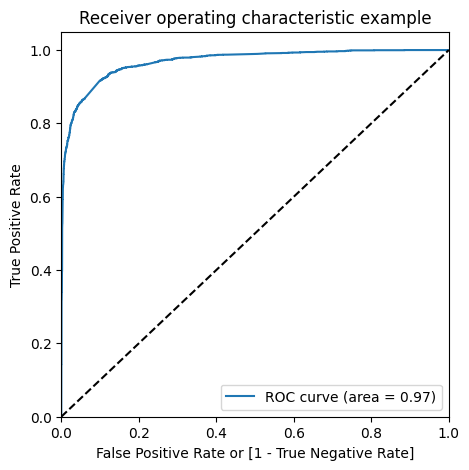

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC Curve should be a value close to 1. We are getting a ROC value of 0.97 indicating a good predictive model.

In [ ]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.134435,0,1,1,0,0,0,0,0,0,0,0
4696,0,0.014774,0,1,0,0,0,0,0,0,0,0,0
3274,0,0.150827,0,1,1,0,0,0,0,0,0,0,0
2164,0,0.003148,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.995896,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.973585  0.719474
0.2   0.2  0.884155  0.950105  0.843637
0.3   0.3  0.900112  0.925786  0.884338
0.4   0.4  0.914313  0.860377  0.947450
0.5   0.5  0.914792  0.840671  0.960330
0.6   0.6  0.910962  0.815933  0.969346
0.7   0.7  0.902984  0.781551  0.977589
0.8   0.8  0.893569  0.745493  0.984544
0.9   0.9  0.881602  0.703145  0.991242


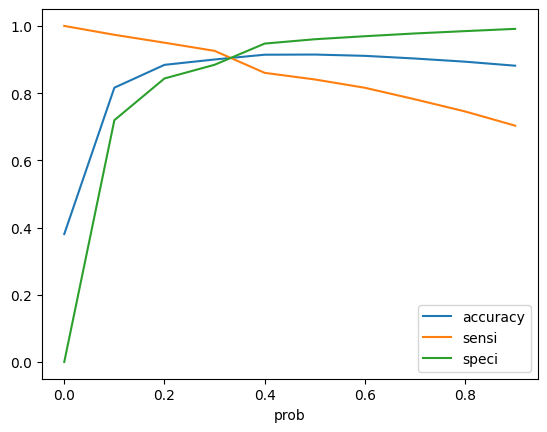

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
9196,1,0.134435,0,1,1,0,0,0,0,0,0,0,0,0
4696,0,0.014774,0,1,0,0,0,0,0,0,0,0,0,0
3274,0,0.150827,0,1,1,0,0,0,0,0,0,0,0,0
2164,0,0.003148,0,1,0,0,0,0,0,0,0,0,0,0
1667,1,0.995896,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','final_Predicted','Lead_Score']].head()

,Converted,Conversion_Prob,final_Predicted,Lead_Score
9196,1,0.134435,0,13
4696,0,0.014774,0,1
3274,0,0.150827,0,15
2164,0,0.003148,0,0
1667,1,0.995896,1,100


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9001116961863731

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3433,  449],
       [ 177, 2208]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9257861635220126

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8843379701184956

In [ ]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11566202988150438


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.8310124200225819


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9509695290858726


In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3433,  449],
       [ 177, 2208]])

In [ ]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8310124200225819

In [ ]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9257861635220126

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8310124200225819

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9257861635220126

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

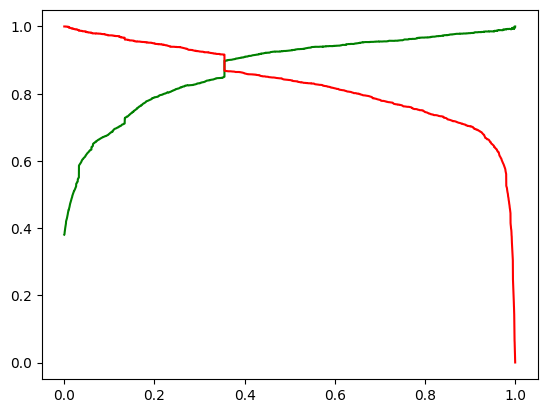

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
984,-0.550262,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
8135,0.812462,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,-0.628665,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test = X_test[col]

X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
984,-0.550262,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
8135,0.812462,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,-0.628665,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test_sm = sm.add_constant(X_test)

Running Predition of the Test Set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

7681    0.010969
984     0.006479
8135    0.405749
6915    0.010012
2712    0.974391
244     0.013622
4698    0.004289
8287    0.031986
6791    0.992100
8970    0.003779
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
7681,0.010969
984,0.006479
8135,0.405749
6915,0.010012
2712,0.974391


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.010969
1,0,984,0.006479
2,0,8135,0.405749
3,0,6915,0.010012
4,1,2712,0.974391


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.010969
1,0,984,0.006479
2,0,8135,0.405749
3,0,6915,0.010012
4,1,2712,0.974391


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.010969,1
1,984,0,0.006479,1
2,8135,0,0.405749,41
3,6915,0,0.010012,1
4,2712,1,0.974391,97


In [ ]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.010969,1,0
1,984,0,0.006479,1,0
2,8135,0,0.405749,41,1
3,6915,0,0.010012,1,0
4,2712,1,0.974391,97,1


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9054355919583023

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1495,  181],
       [  73,  937]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9277227722772278

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8920047732696897

In [ ]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8381037567084079

In [ ]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277227722772278